In [74]:
import warnings
import pandas as pd
import numpy as np

from jre_utils.datapath import factor_data_paths, DATA_DIRECTORY_PATH

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [75]:
migration_unprocessed_path = factor_data_paths["unprocessed"]["migration"]["municipality"]
additional_migration_unprocessed_path = f"{DATA_DIRECTORY_PATH}/municipality/unprocessed/migration/migration_2020_2022.csv"
new_migration_unprocessed_path = f"{DATA_DIRECTORY_PATH}/municipality/unprocessed/migration/migration_1996_2022.csv"

migration_df = pd.read_csv(migration_unprocessed_path)
additional_migration_df = pd.read_csv(additional_migration_unprocessed_path)

In [76]:
area_code_to_area_df = migration_df[["area_code", "area"]].drop_duplicates()
# area_code_to_area_df.set_index("area_code")["area"].to_dict()


In [77]:
import json

area_code_to_area_path = f"{DATA_DIRECTORY_PATH}/core_scraped/area_code_to_area.json"
with open(area_code_to_area_path, 'w') as fp:
    json.dump(area_code_to_area_df.set_index("area_code")["area"].to_dict(), fp)

In [78]:
additional_migration_df = additional_migration_df[additional_migration_df["year"] == 2022]
additional_migration_df

,year,area_code,area,in_migrations,out_migrations,net_migrations
0,2022,0,Japan,4775207,4775207,0
1,2022,1,All shi,4452732,4427106,25626
2,2022,2,All gun,322475,348101,-25626
3,2022,1000,Hokkaido,224525,228548,-4023
4,2022,1001,Hokkaido shi,193184,191190,1994
...,...,...,...,...,...,...
2381,2022,47370,Miyako-gun,58,60,-2
2382,2022,47375,Tarama-son,58,60,-2
2383,2022,47380,Yaeyama-gun,798,783,15
2384,2022,47381,Taketomi-cho,573,587,-14


In [79]:
columns = ["year", "area_code", "area", "in_migrations", "out_migrations"]
additional_migration_df = additional_migration_df.merge(area_code_to_area_df, on=["area_code"], suffixes=["_x", ""])[columns]
additional_migration_df

,year,area_code,area,in_migrations,out_migrations
0,2022,1100,Hokkaido Sapporo-shi,114194,105217
1,2022,1101,Hokkaido Sapporo-shi Chuo-ku,21118,17618
2,2022,1102,Hokkaido Sapporo-shi Kita-ku,14532,13683
3,2022,1103,Hokkaido Sapporo-shi Higashi-ku,14109,13484
4,2022,1104,Hokkaido Sapporo-shi Shiroishi-ku,13322,12717
...,...,...,...,...,...
1911,2022,47361,Okinawa-ken Kumejima-cho,390,506
1912,2022,47362,Okinawa-ken Yaese-cho,1650,1180
1913,2022,47375,Okinawa-ken Tarama-son,58,60
1914,2022,47381,Okinawa-ken Taketomi-cho,573,587


In [82]:
updated_migration_df = pd.concat([additional_migration_df, migration_df])
updated_migration_df = updated_migration_df.sort_values(by=["year", "area_code"], ascending=[False, True])
updated_migration_df = updated_migration_df.drop_duplicates(subset=["year", "area_code"], keep="first")
updated_migration_df

,year,area_code,area,in_migrations,out_migrations
0,2022,1100,Hokkaido Sapporo-shi,114194,105217
1,2022,1101,Hokkaido Sapporo-shi Chuo-ku,21118,17618
2,2022,1102,Hokkaido Sapporo-shi Kita-ku,14532,13683
3,2022,1103,Hokkaido Sapporo-shi Higashi-ku,14109,13484
4,2022,1104,Hokkaido Sapporo-shi Shiroishi-ku,13322,12717
...,...,...,...,...,...
51726,1996,47361,Okinawa-ken Kumejima-cho,549,619
51727,1996,47362,Okinawa-ken Yaese-cho,1539,1212
51728,1996,47375,Okinawa-ken Tarama-son,52,98
51729,1996,47381,Okinawa-ken Taketomi-cho,430,441


In [84]:
updated_migration_df = updated_migration_df.replace("-", np.nan)
updated_migration_df = updated_migration_df.replace("***", np.nan)
updated_migration_df[["in_migrations", "out_migrations"]] = updated_migration_df[["in_migrations", "out_migrations"]].astype(float)
updated_migration_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51731 entries, 0 to 51730
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            51731 non-null  int64  
 1   area_code       51731 non-null  int64  
 2   area            51731 non-null  object 
 3   in_migrations   51184 non-null  float64
 4   out_migrations  49640 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.4+ MB


In [87]:
updated_migration_df[updated_migration_df["area_code"] == 1100]

,year,area_code,area,in_migrations,out_migrations
0,2022,1100,Hokkaido Sapporo-shi,114194.0,105217.0
1916,2021,1100,Hokkaido Sapporo-shi,115389.0,105713.0
3832,2020,1100,Hokkaido Sapporo-shi,117323.0,106924.0
5748,2019,1100,Hokkaido Sapporo-shi,117964.0,108578.0
7664,2018,1100,Hokkaido Sapporo-shi,117434.0,109504.0
9580,2017,1100,Hokkaido Sapporo-shi,119314.0,110535.0
11496,2016,1100,Hokkaido Sapporo-shi,118336.0,109199.0
13412,2015,1100,Hokkaido Sapporo-shi,120932.0,112759.0
15328,2014,1100,Hokkaido Sapporo-shi,119304.0,110941.0
17244,2013,1100,Hokkaido Sapporo-shi,123103.0,113015.0


In [89]:
updated_migration_df["in_migrations"] = updated_migration_df.groupby("area_code")[
    "in_migrations"
].transform(lambda x: x.interpolate(method="polynomial", order=3))

updated_migration_df["out_migrations"] = updated_migration_df.groupby("area_code")[
    "out_migrations"
].transform(lambda x: x.interpolate(method="polynomial", order=3))

updated_migration_df[updated_migration_df["area_code"] == 1100]

,year,area_code,area,in_migrations,out_migrations
0,2022,1100,Hokkaido Sapporo-shi,114194.0,105217.000000
1916,2021,1100,Hokkaido Sapporo-shi,115389.0,105713.000000
3832,2020,1100,Hokkaido Sapporo-shi,117323.0,106924.000000
5748,2019,1100,Hokkaido Sapporo-shi,117964.0,108578.000000
7664,2018,1100,Hokkaido Sapporo-shi,117434.0,109504.000000
9580,2017,1100,Hokkaido Sapporo-shi,119314.0,110535.000000
11496,2016,1100,Hokkaido Sapporo-shi,118336.0,109199.000000
13412,2015,1100,Hokkaido Sapporo-shi,120932.0,112759.000000
15328,2014,1100,Hokkaido Sapporo-shi,119304.0,110941.000000
17244,2013,1100,Hokkaido Sapporo-shi,123103.0,113015.000000


<Axes: xlabel='year'>

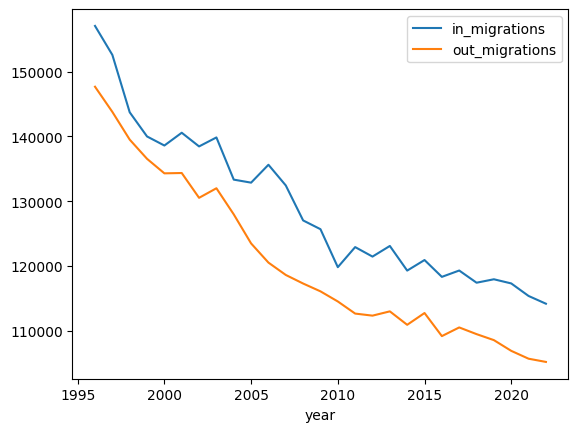

In [91]:
updated_migration_df[updated_migration_df["area_code"] == 1100].plot(x="year", y=["in_migrations", "out_migrations"], kind="line")

In [92]:
updated_migration_df.to_csv(new_migration_unprocessed_path, index=False)
